In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm

font_path = "/home/aaron/.fonts/ARIAL.TTF"  # Adjust path if needed
prop = fm.FontProperties(fname=font_path)

plt.style.use('/home/aaron/thesis.mplstyle')

df_bb = pd.read_csv('./BB/metrics_all_folds-noIMAT.csv')
df_no = pd.read_csv('./noBB/metrics_all_folds-noIMAT.csv')

df_bb['BB'] = 'Yes'
df_no['BB'] = 'No'

df = pd.concat([df_bb, df_no])
df['label'] = df['label'].replace({'SC-Fat': 'SAT'})
df.sort_values(by='PatID', inplace=True)

df_sub = df[df['label'].isin(['Muscle', 'SAT'])]

df_sub = df_sub[df_sub['PatID'] != 1601]

df_sub


Bad key grid.zorder in file /home/aaron/thesis.mplstyle, line 9 ('grid.zorder: 0')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


,PatID,Fold,label,dice,msd,hd95,BB
55,231,2,SAT,0.895,1.038,2.634,Yes
54,231,2,Muscle,0.932,1.673,6.344,Yes
37,231,2,SAT,0.891,1.105,2.634,No
36,231,2,Muscle,0.940,1.481,4.165,No
90,294,3,Muscle,0.947,1.259,3.534,Yes
...,...,...,...,...,...,...,...
58,106958,2,SAT,0.943,0.823,2.356,Yes
25,312108,1,SAT,0.948,1.092,3.003,No
24,312108,1,Muscle,0.915,1.834,5.831,No
36,312108,1,Muscle,0.908,2.038,7.068,Yes


/tmp/ipykernel_542280/3944608175.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot([0, 4], [0, 4], 'k--', lw=2.5, color='black', alpha=1, zorder=0)
/tmp/ipykernel_542280/3944608175.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot([0, 12], [0, 12], 'k--', lw=2.5, color='black', alpha=1, zorder=0)


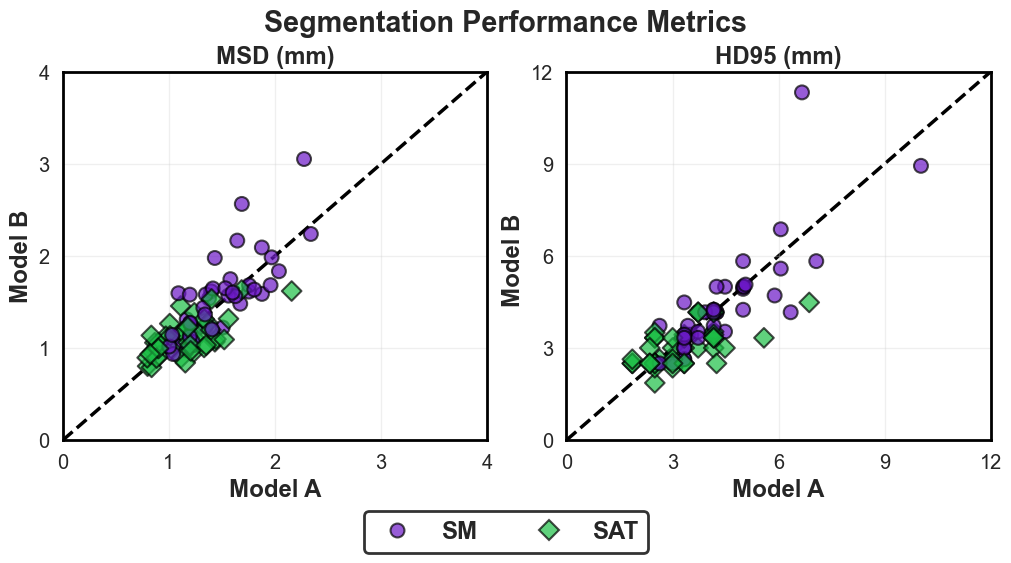

In [ ]:
# identity plot for the metrics
# x-axis: BB, y-axis: No BB

palette_rois = {'Muscle': '#6B17C6',
                'SAT': '#1DBF46'}

shape_rois = {'Muscle': 'o',
                'SAT': 'D'}

df_identity_msd = df_sub[['PatID', 'label', 'msd', 'BB']].pivot(index=['PatID', 'label'], columns='BB', values='msd')
df_identity_hd95 = df_sub[['PatID', 'label', 'hd95', 'BB']].pivot(index=['PatID', 'label'], columns='BB', values='hd95')


fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# MSD
sns.scatterplot(x='Yes', y='No', data=df_identity_msd, ax=ax[0], style='label', markers=shape_rois, legend=False,
                 hue='label', palette=palette_rois, s=100, edgecolor='black', linewidth=1.5, alpha=0.7)
ax[0].plot([0, 4], [0, 4], 'k--', lw=2.5, color='black', alpha=1, zorder=0)
ax[0].set_xlim(0, 4)
ax[0].set_ylim(0, 4)
ax[0].set_xlabel('Model A', fontsize='x-large', weight='bold')
ax[0].set_ylabel('Model B', fontsize='x-large', weight='bold')
ax[0].set_title('MSD (mm)', fontsize='x-large', weight='bold')
ax[0].set_xticks(np.linspace(0, 4, 5))
ax[0].set_yticks(np.linspace(0, 4, 5))
ax[0].tick_params(axis='both', labelsize='large')



# HD95
sns.scatterplot(x='Yes', y='No', data=df_identity_hd95, ax=ax[1], style='label', markers=shape_rois,
                    hue='label', palette=palette_rois, s=100, edgecolor='black', linewidth=1.5, alpha=0.7)
ax[1].plot([0, 12], [0, 12], 'k--', lw=2.5, color='black', alpha=1, zorder=0)
ax[1].set_xlim(0, 12)
ax[1].set_ylim(0, 12)
ax[1].set_xlabel('Model A', fontsize='x-large', weight='bold')
ax[1].set_ylabel('Model B ', fontsize='x-large', weight='bold')
ax[1].set_title('HD95 (mm)', fontsize='x-large', weight='bold')
ax[1].set_xticks(np.linspace(0, 12, 5))
ax[1].set_yticks(np.linspace(0, 12, 5))
ax[1].tick_params(axis='both', labelsize='large')

ax[1].legend_.remove()
# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
labels = [label.replace('Muscle', 'SM') for label in labels]
legend = fig.legend(handles, labels, loc='lower center', 
            edgecolor='black', ncol=2, title_fontsize=16, fontsize='x-large', 
            bbox_to_anchor=(0.5, -0.12), frameon=True, 
            prop={'weight': 'bold', 'size': 'x-large'})

legend.get_frame().set_linewidth(2)

for i in range(2):
    for axis in ['bottom', 'left', 'top', 'right']:
        ax[i].spines[axis].set_linewidth(2)
        ax[i].spines[axis].set_color('black')

#     for axis in ['top', 'right']:
#         ax[i].spines[axis].set_linewidth(0)
#         ax[i].spines[axis].set_color('white')


plt.suptitle('Segmentation Performance Metrics', fontsize='xx-large', horizontalalignment='center', weight='bold')
plt.savefig('./identity_plot.pdf', bbox_inches='tight', dpi=500)
plt.show()


In [ ]:
df_bb

,PatID,Fold,label,dice,msd,hd95,BB
0,448,0,Muscle,0.940,1.119,3.332,Yes
1,448,0,SC-Fat,0.937,0.890,1.863,Yes
2,448,0,BB,1.000,0.000,0.000,Yes
3,3684,0,Muscle,0.935,1.806,4.998,Yes
4,3684,0,SC-Fat,0.936,1.562,4.165,Yes
...,...,...,...,...,...,...,...
130,894,4,SC-Fat,0.927,1.127,3.003,Yes
131,894,4,BB,1.000,0.000,0.000,Yes
132,2602,4,Muscle,0.942,1.877,3.923,Yes
133,2602,4,SC-Fat,0.901,1.396,4.165,Yes


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import sem, t

# Function to calculate 95% CI
def ci_95(x):
    n = len(x)
    mean = np.mean(x)
    std_err = sem(x)  # Standard error of the mean
    h = std_err * t.ppf((1 + 0.95) / 2, n - 1)  # Margin of error
    return (mean - h, mean + h)

In [ ]:
# group by fold and get the mean and std of the metrics

df_bb_grouped = df_bb.groupby(['label', 'Fold']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_bb_grouped.columns = ['_'.join(col) for col in df_bb_grouped.columns]

# round the values
df_bb_grouped = df_bb_grouped.round(3)

# Split the ci_95 column into two separate columns for each metric
df_bb_grouped[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_bb_grouped['msd_ci_95'].tolist(), index=df_bb_grouped.index)
df_bb_grouped[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_bb_grouped['hd95_ci_95'].tolist(), index=df_bb_grouped.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_bb_grouped = df_bb_grouped.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_bb_grouped = df_bb_grouped.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_bb_grouped['msd_ci_95'] = list(zip(df_bb_grouped['msd_ci_95_lower'], df_bb_grouped['msd_ci_95_upper']))
df_bb_grouped['hd95_ci_95'] = list(zip(df_bb_grouped['hd95_ci_95_lower'], df_bb_grouped['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_bb_grouped = df_bb_grouped.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])
# reorder 
df_bb_grouped = df_bb_grouped[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]


# Swap the index levels
df_bb_grouped = df_bb_grouped.swaplevel().sort_index()


df_bb_grouped.to_csv('bb_metrics-fold_ROI.csv')


df_bb_grouped

In [ ]:
# get the avg of the metrics across all folds 
df_bb_avg = df_bb.groupby(['label']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_bb_avg.columns = ['_'.join(col) for col in df_bb_avg.columns]

# round the values
# Split the ci_95 column into two separate columns for each metric
df_bb_avg[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_bb_avg['msd_ci_95'].tolist(), index=df_bb_avg.index)

df_bb_avg[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_bb_avg['hd95_ci_95'].tolist(), index=df_bb_avg.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_bb_avg = df_bb_avg.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_bb_avg = df_bb_avg.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_bb_avg['msd_ci_95'] = list(zip(df_bb_avg['msd_ci_95_lower'], df_bb_avg['msd_ci_95_upper']))
df_bb_avg['hd95_ci_95'] = list(zip(df_bb_avg['hd95_ci_95_lower'], df_bb_avg['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_bb_avg = df_bb_avg.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])


# reorder
df_bb_avg['msd_err'] = (df_bb_avg['msd_std'] / np.sqrt(45)).round(2)
df_bb_avg['hd95_err'] = (df_bb_avg['hd95_std'] / np.sqrt(45)).round(2)



df_bb_avg = df_bb_avg[['msd_mean', 'msd_err', 'msd_ci_95', 'hd95_mean', 'hd95_err', 'hd95_ci_95']]

df_bb_avg.to_csv('bb_metrics-avg_ROI.csv')

df_bb_avg


In [ ]:
# group by fold and get the mean and std of the metrics

df_no_grouped = df_no.groupby(['label', 'Fold']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_no_grouped.columns = ['_'.join(col) for col in df_no_grouped.columns]

# round the values
df_no_grouped = df_no_grouped.round(3)

# Split the ci_95 column into two separate columns for each metric
df_no_grouped[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_no_grouped['msd_ci_95'].tolist(), index=df_no_grouped.index)
df_no_grouped[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_no_grouped['hd95_ci_95'].tolist(), index=df_no_grouped.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_no_grouped = df_no_grouped.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_no_grouped = df_no_grouped.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_no_grouped['msd_ci_95'] = list(zip(df_no_grouped['msd_ci_95_lower'], df_no_grouped['msd_ci_95_upper']))
df_no_grouped['hd95_ci_95'] = list(zip(df_no_grouped['hd95_ci_95_lower'], df_no_grouped['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_no_grouped = df_no_grouped.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])
# reorder 


df_no_grouped = df_no_grouped[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]


# Swap the index levels
df_no_grouped = df_no_grouped.swaplevel().sort_index()

df_no_grouped.to_csv('noBB_metrics-fold_ROI.csv')

df_no_grouped

In [ ]:
# get the avg of the metrics across all folds 
df_no_avg = df_no.groupby(['label']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_no_avg.columns = ['_'.join(col) for col in df_no_avg.columns]

# round the values
# Split the ci_95 column into two separate columns for each metric
df_no_avg[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_no_avg['msd_ci_95'].tolist(), index=df_no_avg.index)

df_no_avg[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_no_avg['hd95_ci_95'].tolist(), index=df_no_avg.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_no_avg = df_no_avg.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_no_avg = df_no_avg.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_no_avg['msd_ci_95'] = list(zip(df_no_avg['msd_ci_95_lower'], df_no_avg['msd_ci_95_upper']))
df_no_avg['hd95_ci_95'] = list(zip(df_no_avg['hd95_ci_95_lower'], df_no_avg['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_no_avg = df_no_avg.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])

df_no_avg['msd_err'] = (df_no_avg['msd_std'] / np.sqrt(45)).round(2)
df_no_avg['hd95_err'] = (df_no_avg['hd95_std'] / np.sqrt(45)).round(2)

# reorder
df_no_avg = df_no_avg[['msd_mean', 'msd_err', 'msd_ci_95', 'hd95_mean', 'hd95_err', 'hd95_ci_95']]


df_no_avg.to_csv('noBB_metrics-avg_ROI.csv')

df_no_avg
